In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import datasets
%matplotlib inline

$p(𝑥)= \sum\limits_{k = 1}^K p_{k}(x) \cdot P(𝑇 = 𝑘)$
где 𝑇 — номер компоненты смеси, а$ p_{k}(𝑥)$ — плотность распределения$ 𝒩(a_{𝑘},Σ_{𝑘})$

In [164]:
iris = datasets.load_iris()

In [165]:
target = pd.DataFrame(iris.target, columns=['target'])

In [166]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# 0 - SETOSA
# 1 - VERSICOLOR
# 2 - VIRGINICA
Разобъем наш датасет на 3 подвыборки

In [167]:
iris.feature_names + ['target']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [168]:
data = []
data.append(pd.DataFrame(iris.data[:50]))
data.append(pd.DataFrame(iris.data[50:100]))
data.append(pd.DataFrame(iris.data[100:]))

In [169]:
target = []
target.append(iris.target[:50])
target.append(iris.target[50:100])
target.append(iris.target[100:150])

Нам необходимо оценить (𝑎1, 𝑎2, 𝑎3, Σ1, Σ2, Σ3), в предположении, что каждая выборка была из гауссова распределения
т.е. $\xi_{i} \sim 𝒩(a, \Sigma) $

Найдем оценки для матожиданий, это довольно просто $a^* = \overline{X}$
А для того, чтобы оценить матрицу ковариаций необходимо взять такую оценку. Для 𝑖-ой и 𝑗-ой компонент она равна $\overline{𝑋^i\cdot𝑋^j} −\overline{𝑋^i}·\overline{𝑋^j}$ В частности для дисперсии  она равна выборочной дисперсии $S^2$. А оценка матрицы Σ равна $\frac{1}{n} \cdot X^T\cdot X$, где $𝑋_{𝑖,𝑗} = 𝑋_{i}^{j} − \overline{𝑋^{j}}$).

У нас элементы выборки из многомерного (4) нормального распределения

In [170]:
zaza = np.zeros((4,4))

In [171]:
def eval_parameters(data, cols = []) :
    a_full = []
    sigmas_full = []
    matrix_size = data[0].shape[1]
    if len(cols) == 0 :
        cols = range(matrix_size)
    for i in range(len(data)) :
        a_full.append([data[i][col].values.mean() for col in data[i][cols].columns])
        current_sigma = np.ndarray(0)
        for k in cols :
            for l in cols :
                current_sigma = np.append(current_sigma, ((data[i][k] * data[i][l]).mean() - data[i][k].mean() * data[i][l].mean()))
        current_sigma = current_sigma.reshape(len(cols), len(cols))
        sigmas_full.append(current_sigma)
    return a_full, sigmas_full

In [172]:
a_full, sigmas_full = eval_parameters(data)

Занумеруем координаты данных векторов числами 0, 1, 2, 3. Для пар координат (0, 1), (1,3) и (2,3) вычислите плотность каждой компоненты смеси (три плотности для каждой пары координат), оценив параметры распределений по проекциям трех выборок (каждая выборка соответствует одной компоненте смеси) на соответствующие плоскости. Нарисуйте графики (рисовать нужно линии уровня) этих плотно- стей (3 × 3 = 9 штук), на которые нанесите также соответствующие проекции точек выборки.

In [173]:
a_0_1, sigma_0_1 = eval_parameters(data, [0,1])
a_1_3, sigma_1_3 = eval_parameters(data, [1,3])
a_2_3, sigma_2_3 = eval_parameters(data, [2,3])

In [174]:
means_ans = []
means_ans.append(a_0_1)
means_ans.append(a_1_3)
means_ans.append(a_2_3)

In [175]:
sigma_ans = []
sigma_ans.append(sigma_0_1)
sigma_ans.append(sigma_1_3)
sigma_ans.append(sigma_2_3)

Зададим теперь распределения с подсчитанными нами параметрами!


In [176]:
matrica = []
#matrica = np.zeros((3,3))
matrica.append(scipy.stats.multivariate_normal(mean=a_0_1[0], cov=sigma_0_1[0]))


In [177]:
matrix = np.ndarray(0)
for i in range(3):
    matrix = np.append(matrix, scipy.stats.multivariate_normal(mean=a_0_1[i], cov=sigma_0_1[i]))
for i in range(3):
    matrix = np.append(matrix, scipy.stats.multivariate_normal(mean=a_1_3[i], cov=sigma_1_3[i]))
for i in range(3):
    matrix = np.append(matrix, scipy.stats.multivariate_normal(mean=a_2_3[i], cov=sigma_2_3[i]))  
    
#matrix = matrix.reshape(3,3)

In [178]:
limits = [[4.3, 6, 2, 5], [2, 5,0, .7], [0.6, 2,0,0.8],[4.6,8, 1.6,3.6], [2,3.6,0.9,2], [2.5,5.8, 0.8,2], [4.5, 8, 2, 4], [2,4,1.3,2.8],[4.2,7,1.3,2.9]]

In [179]:
limits = np.asarray(limits)
len(limits)

9

# COLOR_GENERATOR

In [180]:
symbols = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
import random
def color_generator() :
    col = '#'
    for i in range(6) :
        col += (symbols[random.randint(0, 1234567) % 997 % 16])
    return col

Геометрическая интерпретация нормальной плотности такова. Если признаки некоррелированы и $\Sigma = diag(\sigma_{1}^2, . . . , \sigma_{n}^2)$, то линии уровня плотности распределения имеют форму эллипсоидов с центром μ и осями, параллельными линиям координат

Если признаки коррелированы, то матрица $\Sigma$ не диагональна и линии уровня имеют форму эллипсоидов, оси которых повёрнуты относительно исходной системы координат. Действительно, как всякая симметричная матрица, $\Sigma$ имеет спектральное разложение:

$ \Sigma = V\cdot S\cdot V^T, где V = (v_{1}, . . . , v_{n})$ — ортогональные собственные векторы матрицы $\Sigma$,

соответствующие собственным значениям $λ_{1},...,λ_{n}$, матрица S диагональна,$ S = diag(λ_{1}, . . . , λ_{n})$. Тогда

$\Sigma^{-1} = V \cdot S^{−1} \cdot V^T,$ следовательно,

$(x − \mu)^T \cdot \Sigma^{-1} \cdot (x − \mu) = (x − \mu)^T \cdot V \cdot S^{−1} \cdot V^T \cdot (x − \mu) = (x′ − \mu′)^T \cdot S^{-1} \cdot (x′ − \mu′).$


Это означает, что в результате ортогонального преобразования координат $x′ = V^{T} \cdot x,$ V-матрица перехода оси эллипсоидов становятся параллельны линиям координат. В новых координатах ковариационная матрица S является диагональной. Поэтому линейное преобразование V называется декоррелирующим. В исходных координатах оси эллипсоидов направлены вдоль собственных векторов матрицы \Sigma.

Убедимся в вышесказанном, нарисовав графики плотностей


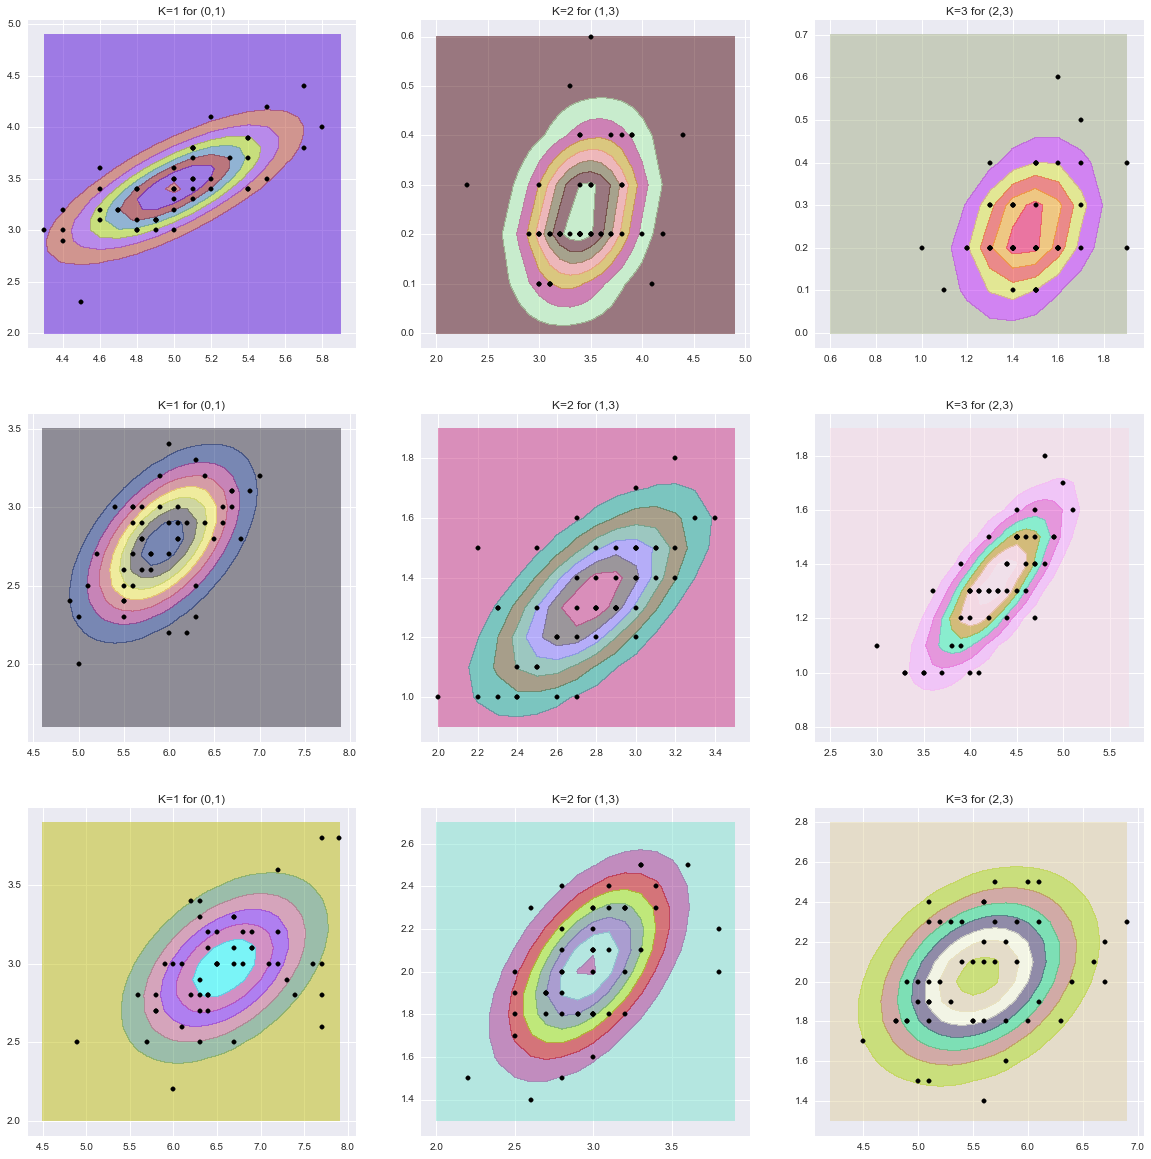

In [181]:
f, ax = plt.subplots(3,3)
f.set_figheight(20)
f.set_figwidth(20)
cols1 = [0, 1, 2]
cols2 = [1, 3, 3]
for i in range(3):
    for j in range(3):
        lim_x_l, lim_x_r, lim_y_l, lim_y_r = limits[3 * i + j]
        x, y = np.mgrid[lim_x_l:lim_x_r:0.1 , lim_y_l:lim_y_r:0.1]
        pos = np.empty(x.shape + (2,))
        pos[:, :, 0] = x; pos[:, :, 1] = y
        rv = scipy.stats.multivariate_normal(means_ans[j][i], sigma_ans[j][i])
        ax[i][j].contourf(x, y, rv.pdf(pos), alpha=0.5, colors=(color_generator(), color_generator(), color_generator(), color_generator(), color_generator(), color_generator()))
        ax[i][j].scatter(data[i][cols1[j]], data[i][cols2[j]], color='black')
        ax[i][j].set_title('K={} for ({},{})'.format(j+1, cols1[j], cols2[j]))
plt.show()

$P(T = k) = \frac{1}{3}$
$E(𝑋|𝑇 \neq 𝑘) = E(X)$ на не равных k, т.е. просто полусумма матожиданий, уже известных нам

In [182]:
for i in range(len(a_full)) :
    a_full[i] = np.asarray(a_full[i])

In [183]:
conditional_expectation = []
conditional_expectation.append((a_full[1] + a_full[2]) / 2.) 
conditional_expectation.append((a_full[0] + a_full[2]) / 2.) 
conditional_expectation.append((a_full[1] + a_full[0]) / 2.) 

Найдем условную плотность $p(X | I(T \not= k))(X|1)$ Т.к. она равна так же полусумме плотностей


Классифицируйте все пространство 4-мерных векторов по принципу $𝑘 = arg max 𝑝_{(𝑋|𝐼\{𝑇 =𝑘\})}(𝑥|1)$

In [185]:
data_all = pd.DataFrame(iris.data, columns=range(4))

In [186]:
data_matrix = data_all.as_matrix()

In [187]:
data_all['target'] = pd.DataFrame([np.argmax([scipy.stats.multivariate_normal.pdf(dot, mean=a_full[i], cov=sigmas_full[i]) for i in range(3)]) for dot in data_matrix]) + 1

In [188]:
erorki = [np.sum([prediction != (i + 1) for prediction in data_all['target'][50 * i : 50 * (i + 1)]]) for i in range(3)]

(0,1), (1,3) и (2,3) Na nih classificirovat

Только на трех элементах мы допустили ошибку 3 / 150 = 0.02
ошибка 2 %

In [189]:
to_draw = []
to_draw.append(data_all[data_all.target == 1])
to_draw.append(data_all[data_all.target == 2])
to_draw.append(data_all[data_all.target == 3])

In [190]:
def predict(dot) :
   return np.argmax([scipy.stats.multivariate_normal.pdf(dot, mean=a_full[i], cov=sigmas_full[i]) for i in range(3)]) + 1

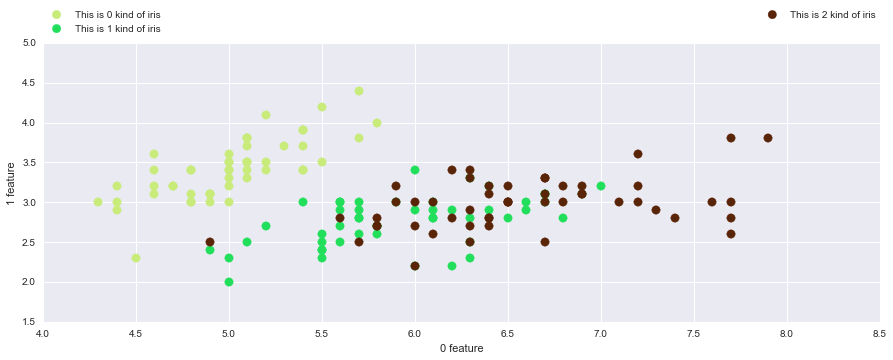

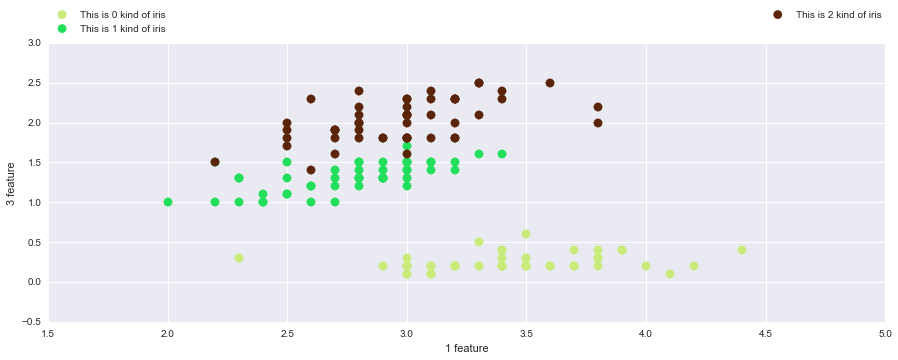

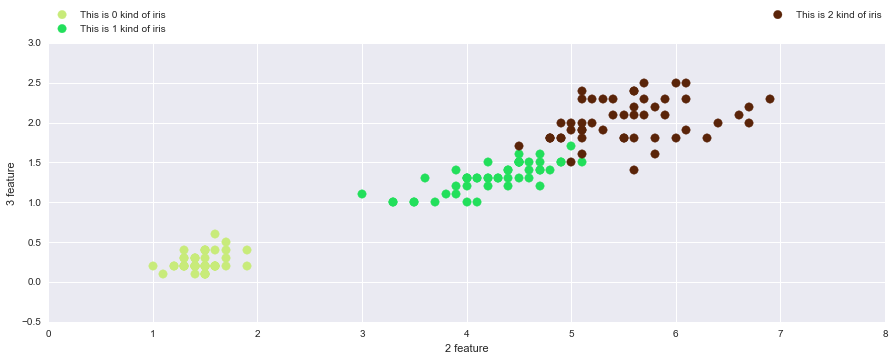

In [192]:
cols1 = [0, 1, 2]
cols2 = [1, 3, 3]
colors = [color_generator() for i in range(3)]
for i in range(3) :
    plt.figure(figsize=(15, 5))
    for j in range(3) :
        plt.scatter(to_draw[j][cols1[i]], to_draw[j][cols2[i]], s= 72, color=colors[j], label= 'This is ' + str(j) + ' kind of iris')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.xlabel(str(cols1[i]) + ' feature')
    plt.ylabel(str(cols2[i]) + ' feature')
    plt.show()

In [193]:
from matplotlib.colors import ListedColormap
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])